In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
maindf = pd.read_csv('../train.csv')
maindf.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [2]:
df4151 = maindf.iloc[:, 41:51]
df4151["SalePrice"] = maindf["SalePrice"]
print(df4151.columns)
df4151.tail()

Index(['CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'SalePrice'],
      dtype='object')


,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,SalePrice
1455,Y,SBrkr,953,694,0,1647,0,0,2,1,175000
1456,Y,SBrkr,2073,0,0,2073,1,0,2,0,210000
1457,Y,SBrkr,1188,1152,0,2340,0,0,2,0,266500
1458,Y,FuseA,1078,0,0,1078,1,0,1,0,142125
1459,Y,SBrkr,1256,0,0,1256,1,0,1,1,147500


In [4]:
df4151_Electrical = pd.DataFrame(df4151, columns=['Electrical'])
df4151_Electrical['SalePrice'] = df4151['SalePrice'] 
df4151_f2 = df4151.groupby(['Electrical']).size().reset_index(name='Counts')
df4151_f2   #전기 시스템 
#        SBrkr Standard Circuit Breakers & Romex
#        FuseA Fuse Box over 60 AMP and all Romex wiring (Average)	
#        FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)
#        FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)
#        Mix   Mixed

,Electrical,Counts
0,FuseA,94
1,FuseF,27
2,FuseP,3
3,Mix,1
4,SBrkr,1334


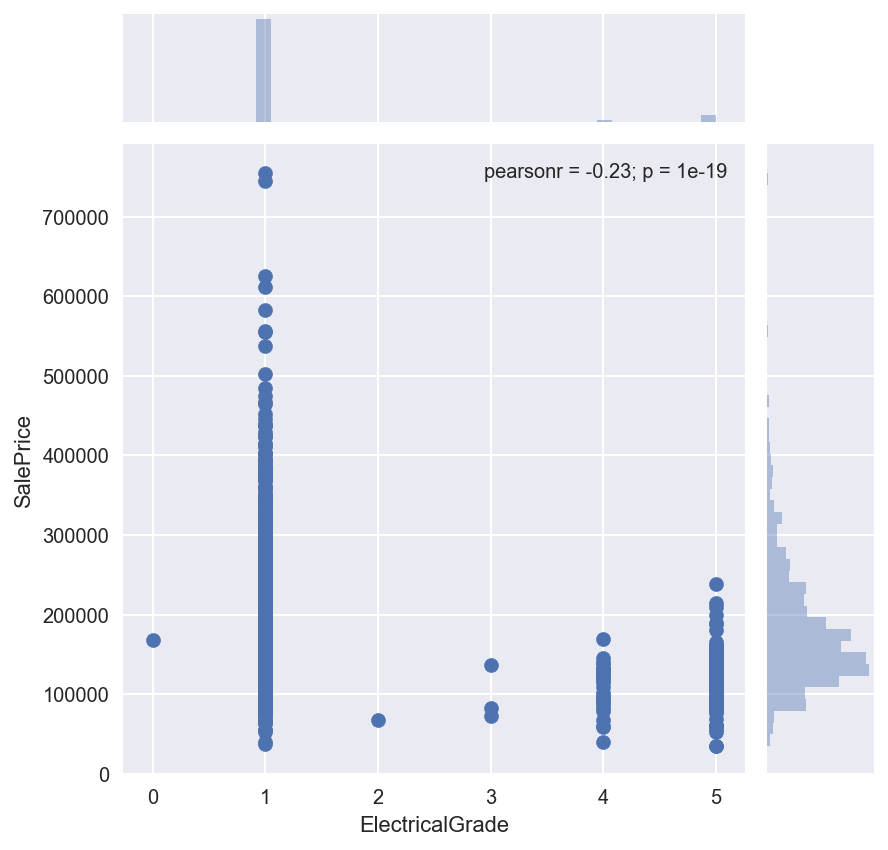

In [6]:
def Electricalgrade(data) :
    if data == 'FuseA':
        return 5
    if data == 'FuseF':
        return 4
    if data == 'FuseP':
        return 3
    if data == 'Mix':
        return 2
    if data == 'SBrkr':
        return 1
    else:
        return 0
df4151_Electrical['ElectricalGrade'] = df4151_Electrical['Electrical'].apply(Electricalgrade)
sns.jointplot(x="ElectricalGrade", y="SalePrice", data=df4151_Electrical)

In [7]:
df4151_CentralAir= pd.DataFrame(df4151, columns=['CentralAir'])
df4151_CentralAir['SalePrice'] = df4151['SalePrice'] 
df4151_f2 = df4151.groupby(['CentralAir']).size().reset_index(name='Counts')
df4151_f2   #전기 시스템 
#        SBrkr Standard Circuit Breakers & Romex
#        FuseA Fuse Box over 60 AMP and all Romex wiring (Average)	
#        FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)
#        FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)
#        Mix   Mixed

,CentralAir,Counts
0,N,95
1,Y,1365


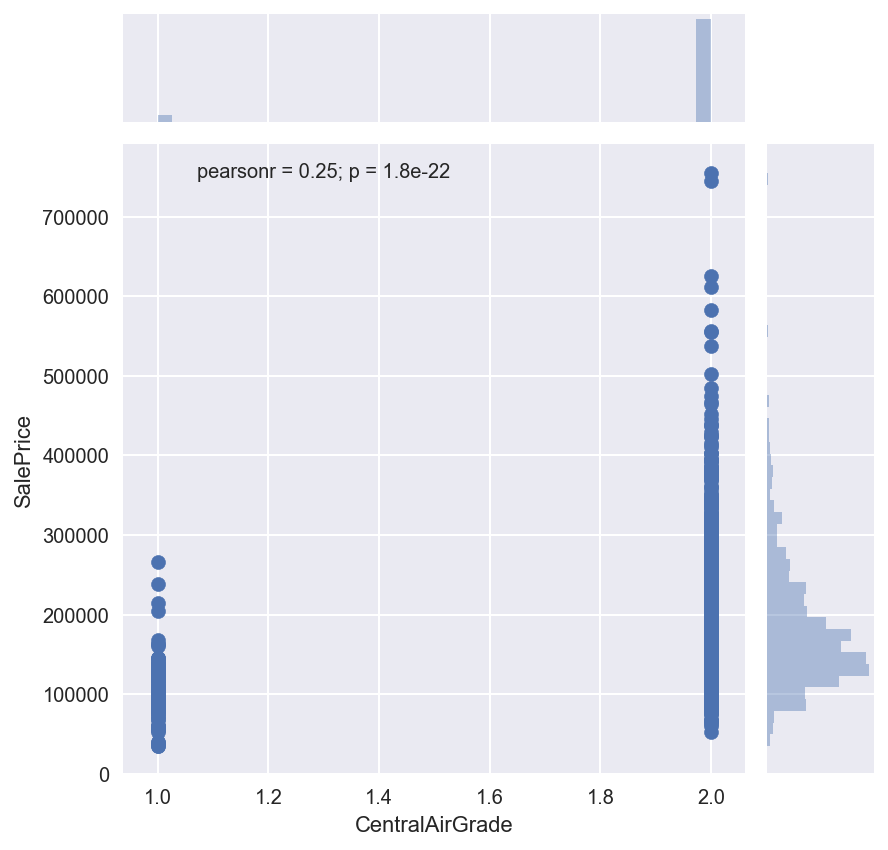

In [9]:
def CentralAirgrade(data) :
    if data == 'Y':
        return 2
    if data == 'N':
        return 1
    else:
        return 0
df4151_CentralAir['CentralAirGrade'] = df4151_CentralAir['CentralAir'].apply(CentralAirgrade)
sns.jointplot(x="CentralAirGrade", y="SalePrice", data=df4151_CentralAir)